In [2]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import random
import sys
import pandas as pd
import tensorflow as tf
#for plot theme
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

In [3]:
def grayscale(img):
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    return image

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

Before pre-processing


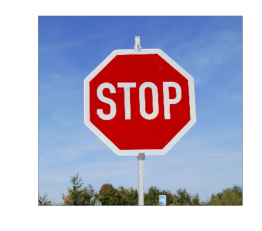

In [4]:
import requests
from PIL import Image
url = 'Testing Images/sample 3.png'
image = Image.open(url)
plt.axis('off')
print("Before pre-processing")
plt.imshow(image, cmap=plt.get_cmap('gray'))

(32, 32)
After pre-processing


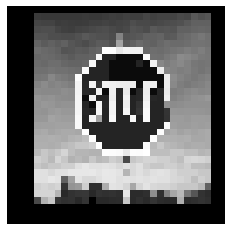

In [5]:
img = np.asarray(image)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)
print("After pre-processing")
img = img.reshape(1, 32, 32, 1)

In [6]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [7]:
from tensorflow.keras.models import load_model
model=load_model('trained_model.h5')
prediction = str(model.predict_classes(img))
prediction = prediction[1:-1]

Identified sign: 14
Identified sign: Stop


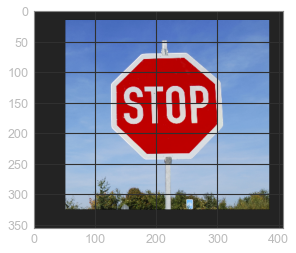

In [8]:
pred = int(prediction)
plt.imshow(image)
data = pd.read_csv('german-traffic-signs/signnames.csv')

for num, name in data.iteritems():
  name = name.values
  print("Identified sign: "+ str(name[pred]))